# Load Packages

In [2]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
# Load additional scikit learn packages! if you need

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

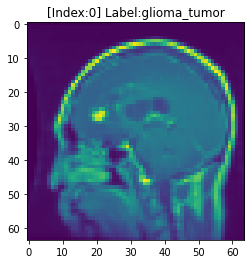

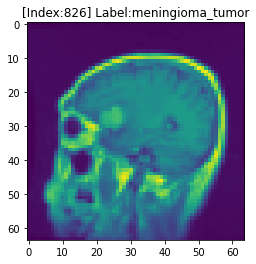

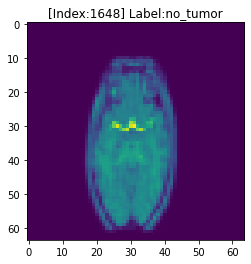

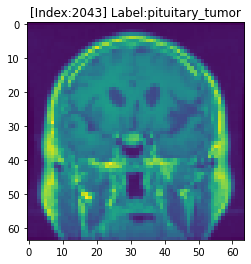

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [29]:
# from sklearn.model_selection import GridSearchCV

# classifiers = {
#     'Support Vector Machine': (sklearn.svm.SVC(random_state=42), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
#     'Logistic Regression': (sklearn.linear_model.LogisticRegression(random_state=42, max_iter=1000), {'C': [0.1, 1, 10]}),
#     'Random Forest': (sklearn.ensemble.RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200]})
# }


# best_model = None
# best_params = None
# best_score = 0

# for clf_name, (clf, param_grid) in classifiers.items():
#     grid_search = GridSearchCV(clf, param_grid, cv=5)
#     grid_search.fit(X_train, y_train)
#     if grid_search.best_score_ > best_score:
#         best_model = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_score = grid_search.best_score_

best_model = sklearn.ensemble.RandomForestClassifier(n_estimators=200, random_state=42)
# best_params = {'n_estimators': 200}
# best_score = 0.8860237466036402

print("best model: ", best_model)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

best model:  RandomForestClassifier(n_estimators=200, random_state=42)
Accuracy: 0.89


### Print accuracy (do not modify the following block)

In [30]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89
